In [713]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from tqdm import tqdm
from scipy.stats import chi2
from scipy.stats import norm
from math import factorial
from scipy.stats import exponweib



def Actualizar_posc(theta: float, x: float, y: float):
    lstep=0.4
    x += lstep * np.cos(theta)
    y += lstep * np.sin(theta)
    
    return x,y


def experimento()->int:
    #ang = np.random.uniform( 0,2*np.pi, size = 3000 )
    x=0
    y=0
    pasos=0
    while (x<=2.5 and y<=2.5 and x>= -2.5 and y>=-2.5):
        ang = np.random.uniform( 0 , 2*np.pi)
        x,y =Actualizar_posc(ang,x,y)
        pasos+=1
    return pasos


In [714]:
p=[]
NSteps = 200
for i in range(NSteps):
    p.append(experimento())
print(p)

min_ = np.min(p)
max_ = np.max(p)
h = 15


[96, 37, 40, 28, 42, 58, 130, 75, 180, 26, 13, 35, 54, 91, 43, 14, 136, 83, 23, 32, 143, 64, 24, 35, 107, 44, 21, 79, 18, 120, 19, 70, 34, 22, 75, 42, 43, 196, 107, 40, 76, 84, 25, 94, 35, 87, 83, 44, 65, 76, 47, 237, 39, 104, 32, 32, 35, 52, 37, 39, 43, 141, 62, 12, 102, 58, 46, 31, 42, 29, 41, 30, 24, 21, 49, 15, 42, 39, 24, 46, 47, 44, 65, 36, 62, 25, 38, 43, 25, 81, 25, 39, 24, 75, 59, 106, 59, 43, 46, 93, 113, 10, 46, 27, 18, 24, 60, 26, 29, 40, 19, 20, 38, 56, 44, 19, 15, 54, 21, 28, 53, 22, 19, 109, 23, 57, 62, 62, 19, 99, 11, 23, 101, 84, 27, 35, 37, 16, 35, 82, 40, 37, 115, 81, 107, 39, 50, 152, 20, 140, 72, 17, 20, 13, 53, 71, 73, 18, 46, 24, 24, 21, 60, 244, 44, 12, 47, 21, 36, 32, 16, 54, 15, 19, 69, 37, 14, 98, 33, 37, 20, 115, 18, 19, 25, 74, 196, 99, 47, 20, 57, 23, 36, 48, 148, 35, 19, 24, 40, 74]


El valor medio de pasos según el ajuste es 53.68143842993736


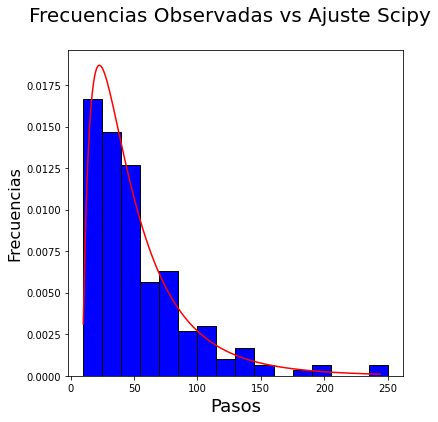

In [715]:
bins = np.arange(min_,max_+h,h)

#x = np.linspace(0,6,7)

hcopy,_ = np.histogram(p, bins=bins, density=False)
h, bins1 = np.histogram(p, bins=bins, density=True)

w = np.diff(bins1)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.bar( bins1[:-1]+0.5*w[0], h, color='b', width=w, ec='k' )



a,c,d,e = exponweib.fit(p) 
# a = param. exponencial, b = potencia a la que se eleva, media, desv. est.
mean = exponweib.mean(a,c,d,e)
print(f"El valor medio de pasos según el ajuste es {mean}")
x = np.linspace(min_, max_, 201)
y = exponweib.pdf(x,a,c,d,e) # cambiar a weibull
plt.plot(x, y, c='red')
    
fig.suptitle('Frecuencias Observadas vs Ajuste Scipy', fontsize=20)
plt.xlabel('Pasos', fontsize=18)
plt.ylabel('Frecuencias', fontsize=16)

H1Norm = h / np.sum(h*w)

200
16


<BarContainer object of 16 artists>

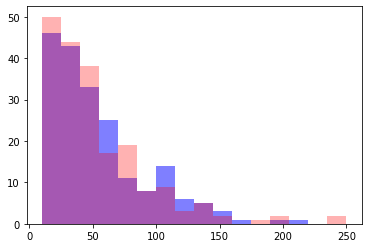

In [716]:
# Expected (Esperado)
ExpFreq = []
for i in range(NSteps):
    ExpFreq.append(exponweib.rvs(a,c,d,e))
    
print(len(ExpFreq))
h2, bins2 = np.histogram(ExpFreq, bins = bins)
print(len(h2))

fig = plt.figure()
ax2 = fig.add_subplot()
ax2.bar(bins1[:-1]+0.5*w[0], h2, alpha = 0.5, width = w, color = 'b')
ax2.bar(bins1[:-1]+0.5*w[0], hcopy, alpha = 0.3, width = w, color = 'r')

In [717]:
# e
EP = 0
NClases = 0

for i, j in zip(hcopy, h2):
    if i > 5 and j > 5: 
        NClases += 1
        r = ((i-j)**2)/j 
        EP += r


print(f"g) El estadístico de prueba chi2 es: {round(EP,2)}")

df = NClases-1-1
prob = chi2.cdf(EP, df = df)
pvalue = 1 - prob

upper = chi2.ppf(0.95, df = df)
print(f"h) El valor crítico de la distribución chi2 con una significancia del 0.05 es: {upper}")


conclusion1a = "Como el estadístico de prueba es menor que el valor crítico, no rechazamos la hipótesis nula"
conclusion1b = "Se concluye que los datos siguen una distribución Weibull exponencial con un nivel de confianza del 95%"

conclusion2a = "Como el estadístico de prueba es mayor que el valor crítico, rechazamos la hipótesis nula"
conclusion2b = "Se concluye que los datos no siguen una distribución Weibull exponencial con un nivel de confianza del 95%"

if (EP < upper):
    print(f"i) {conclusion1a}")
    print(f"j) {conclusion1b}")
else:
    print(f"i) {conclusion2a}")
    print(f"j) {conclusion2b}")
    
    

16 15 7
g) El estadístico de prueba chi2 es: 11.29
h) El valor crítico de la distribución chi2 con una significancia del 0.05 es: 11.070497693516351
i) Como el estadístico de prueba es mayor que el valor crítico, rechazamos la hipótesis nula
j) Se concluye que los datos no siguen una distribución Weibull exponencial con un nivel de confianza del 95%
